In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading csv file which contains the amount of calories burnt by an user

cal_df = pd.read_csv('calories.csv')

In [3]:
cal_df.shape

(15000, 2)

In [4]:
cal_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


* User_ID - ID for each unique user.
* Calories - Calories the user burnt.

In [5]:
# Reading the csv file which contains the detail which is needed to calculate amount of calories burnt

ex_df = pd.read_csv('exercise.csv')

In [6]:
ex_df.shape

(15000, 8)

In [7]:
ex_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


* User_ID - ID for each unique user. (Here, values in User_ID column is same as User_ID column in previous csv file)
* Gender - Gender of the user.
* Age - Age of the user.
* Height - Height of the user. (in cm)
* Weight - Weight of the user. (in kg)
* Duration - Duration of the exercise done by the user. (in minutes)
* Heart_Rate - Heart rate of the user during exercise to check the intensity of exercise. (in bpm)
* Body_Temp - Body temperature of the user during exercise to check the exercise intensity. (in celsius)

In [8]:
# Merging both the dataframes and creating a new dataframe

df = pd.concat([ex_df, cal_df['Calories']], axis = 1) # Joining the 'Calories' column with ex_df dataframe

In [9]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
df.shape

(15000, 9)

In [11]:
# Getting the statistics of the numerical features

df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


* Numerical features - User_ID, Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Calories
* Categorical feature - Gender

* Features - Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Gender
* Label - Calories

In [13]:
# Checking for null values in ecah column

df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

* The dataset has no missing values

# Data analysis and visualization

In [14]:
# Setting the theme for plot

sns.set()

#### Checking the correlations

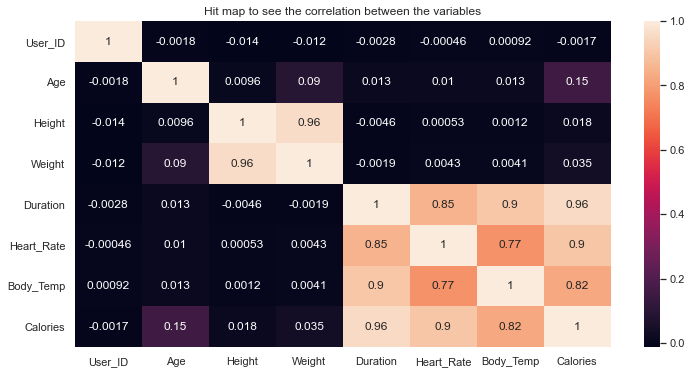

In [15]:
# Checking for correlation between the features and label using heatmap

plt.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(df.corr(), annot = True)
plt.title('Hit map to see the correlation between the variables')
plt.show()

From the plot -
* `Height` and `Weight` are highly correlated.
* `Heart_Rate`, `Duration`, `Body_Temp`, and `Calories` are highly correlated with each other.
* `Calories` is highly correlated to `Duration`, `Heart_Rate` and `Body_Temp`.

In [16]:
# Checking the correaltions numerically

df.corr()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


#### Checking the distribution of data

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


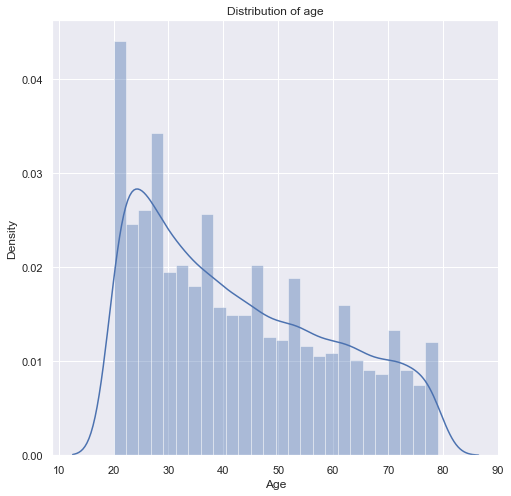

In [17]:
# Distribution of'Age'

plt.figure(figsize = (8, 8))
sns.distplot(df['Age'])
plt.title('Distribution of age')
plt.show()

* Maximum people belong to the age group of `20 - 30` years.
* As age increases, distribution decreases, which means older people don't prefer doing exercise.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


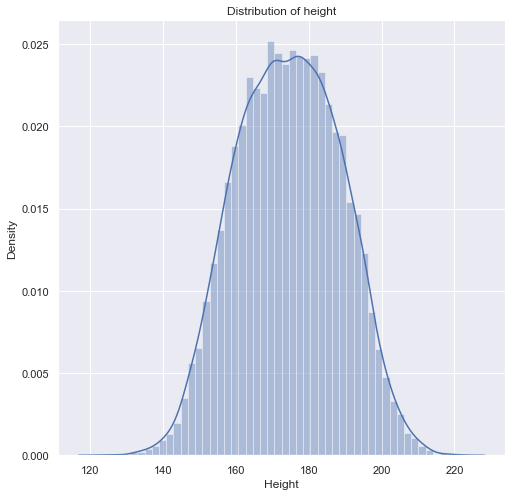

In [18]:
# Distribution of'Height'

plt.figure(figsize = (8, 8))
sns.distplot(df['Height'])
plt.title('Distribution of height')
plt.show()

* Heights are uniformly distributed.
* Most people have aheight ranging between `160 - 180` cm.
* Height below 140 cm and above 200 cm is rare.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


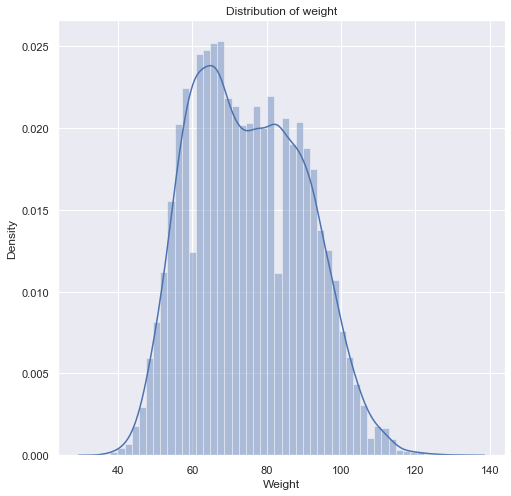

In [19]:
# Distribution of'Weight'

plt.figure(figsize = (8, 8))
sns.distplot(df['Weight'])
plt.title('Distribution of weight')
plt.show()

* Most people had a weight between `60 - 70` kg.
* Person with weight above 100 kg and less than 50 kg is rear, which means `people are conscious about health`.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


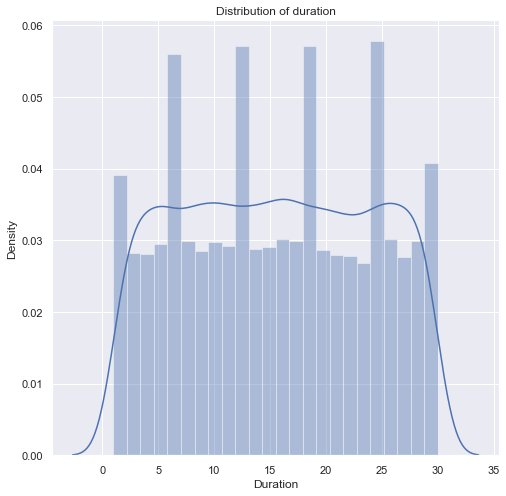

In [20]:
# Distribution of'Duration'

plt.figure(figsize = (8, 8))
sns.distplot(df['Duration'])
plt.title('Distribution of duration')
plt.show()

* People prefer to do exercise for a duration between `5 - 25` minutes.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


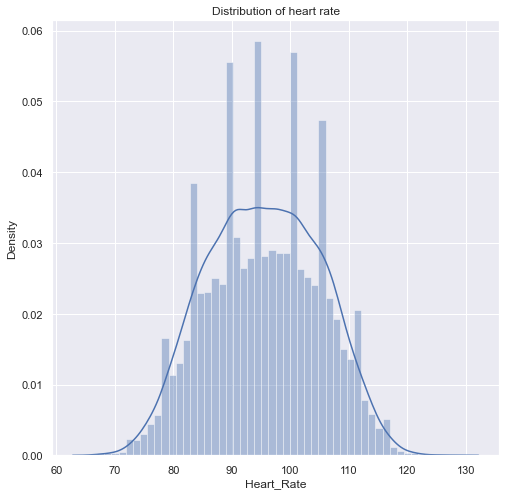

In [21]:
# Distribution of'Heart_Rate'

plt.figure(figsize = (8, 8))
sns.distplot(df['Heart_Rate'])
plt.title('Distribution of heart rate')
plt.show()

* Heart rate is uniformly ditributed.
* Heart rate for majority people lie between `90 - 100` bpm during exercise, which is fine.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


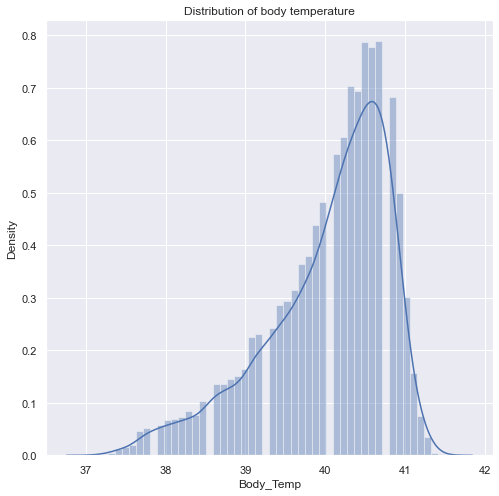

In [22]:
# Distribution of'Bpdy_Temp'

plt.figure(figsize = (8, 8))
sns.distplot(df['Body_Temp'])
plt.title('Distribution of body temperature')
plt.show()

* Plot consists of skewness.
* Most people have a body temperature between `40 - 41` degree celcius while exercise.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


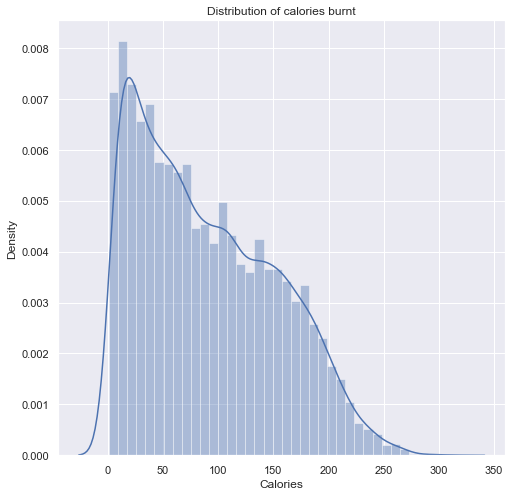

In [23]:
# Distribution of'Calories'

plt.figure(figsize = (8, 8))
sns.distplot(df['Calories'])
plt.title('Distribution of calories burnt')
plt.show()

* Most peope burnt `1- 50` calories, which is not good.
* Significant amount of people burnt 51 - 200 calories.
* People who burnt more than 200 calories are rare.

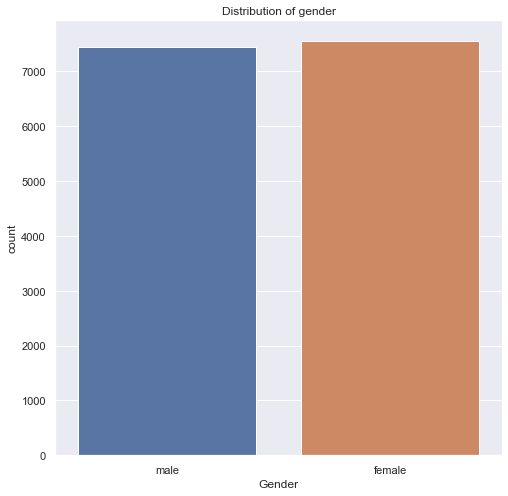

In [24]:
# Distribution of'Gender'

plt.figure(figsize = (8, 8))
sns.countplot(data = df, x = 'Gender')
plt.title('Distribution of gender')
plt.show()

* Both males and females prefer to do some exercise.
* `Females` who does exercise is slightly greater than male.

In [25]:
# To get the exact value

df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

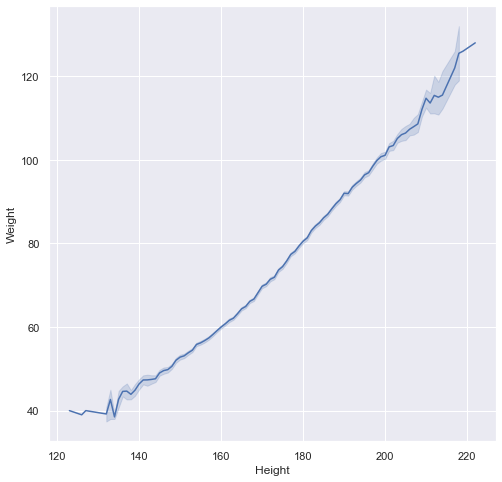

In [26]:
# Relationship between height and weight

plt.figure(figsize = (8, 8))
sns.lineplot(data = df, x = 'Height', y = 'Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

* As height increase, weight also increases.
* Height and weight are `directly proportional`.

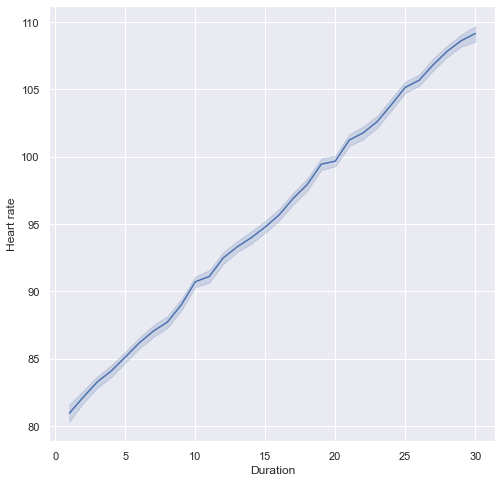

In [27]:
# Relationship between duration and heart rate

plt.figure(figsize = (8, 8))
sns.lineplot(data = df, x = 'Duration', y = 'Heart_Rate')
plt.xlabel('Duration')
plt.ylabel('Heart rate')
plt.show()

* Heart beat increses with duration of exercise - `directly proportional`

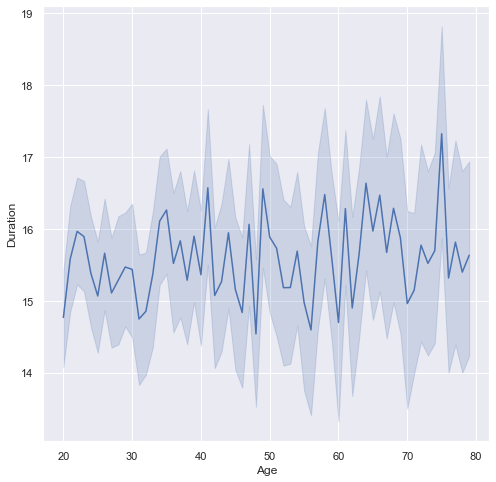

In [28]:
# Relationship between age and duration

plt.figure(figsize = (8, 8))
sns.lineplot(data = df, x = 'Age', y = 'Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

* Age and duration of exercise are not much related.

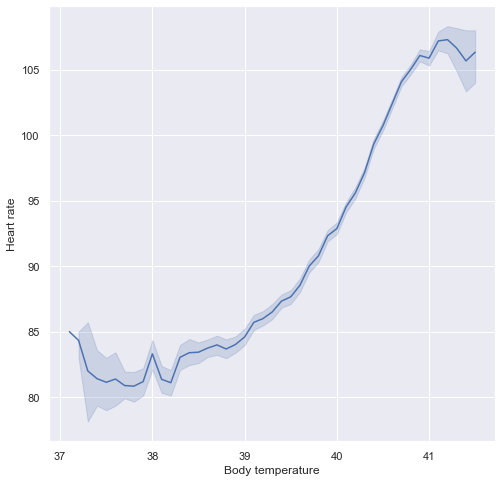

In [29]:
# Relationship between heart rate and body temperature

plt.figure(figsize = (8, 8))
sns.lineplot(data = df, x = 'Body_Temp', y = 'Heart_Rate')
plt.xlabel('Body temperature')
plt.ylabel('Heart rate')
plt.show()

* With increase in heart rate, body temperature slowly increases.

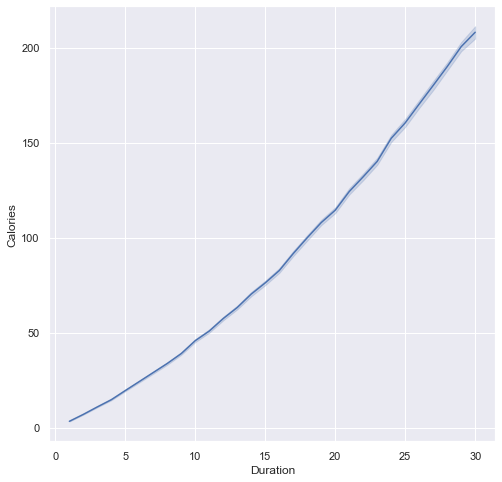

In [30]:
# Relationship between duration and calories burnt

plt.figure(figsize = (8, 8))
sns.lineplot(data = df, x = 'Duration', y = 'Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()

* With increase in duration of exercise, more calories are burnt. - `directly proportional`

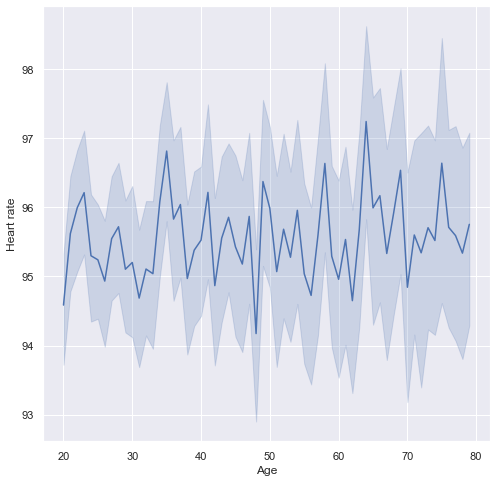

In [31]:
# Relationship between heart rate and age

plt.figure(figsize = (8, 8))
sns.lineplot(data = df, x = 'Age', y = 'Heart_Rate')
plt.xlabel('Age')
plt.ylabel('Heart rate')
plt.show()

* Age and heart rate during the exercise are not related.

# Data preprocessing

#### Encoding

In [32]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [33]:
# Encoding values in gender column
# male - 0 and female - 1

df.replace({'Gender':{'male':0, 'female':1}}, inplace = True)

In [34]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Using the dataset in model

In [35]:
# Splitting the dataset into features and label

x = df.drop(columns = ['User_ID', 'Calories'], axis = 1)
y = df['Calories']

In [36]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [37]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [38]:
# Splitting the data for training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [39]:
print (x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


## Using XGBRegressor

In [40]:
from xgboost import XGBRegressor
from sklearn import metrics

In [41]:
# Training the model

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Evaluation

In [42]:
# For training data

train_pred = xgb.predict(x_train)
acc_train = metrics.r2_score(y_train, train_pred)
print ('R2 score for training data:', acc_train)

R2 score for training data: 0.9995517443430838


In [43]:
# For testing data

test_pred = xgb.predict(x_test)
acc_test = metrics.r2_score(y_test, test_pred)
print ('R2 score for testing data:', acc_test)

R2 score for testing data: 0.9988455491362879


* As the difference between r2 score of training and testing data is very less, the model has a `good accuracy`.

In [44]:
# Calculating mean absolute error

mae = metrics.mean_absolute_error(y_test, test_pred)
print ('Mean absolute error for the model:', mae)

Mean absolute error for the model: 1.4807048829992613


* Mean absolute error is very less when according to the dataset, which is `good`.
* As mae = 1.48, if the actual values is 192, the model may predict it as 193 or 194.

# Prediction system

In [45]:
# Giving input to the prediction system
inp = (1, 39, 156.0, 62.0, 28.0, 104.0, 40.8)

# Converting input to array
inp_arr = np.asarray(inp)

# Reshaping the array so that it can take 1 row as input and shouldn't expect the no. of rows provided for training as input
inp_reshape = inp_arr.reshape(1, -1)

# Making prediction based on input
pred = xgb.predict(inp_reshape)

In [47]:
print ('Actual calories burnt according to csv file:', 170.0)
print ('Prediction made by the model:', pred[0])

Actual calories burnt according to csv file: 170.0
Prediction made by the model: 170.7467
